# PROJET MACHINE LEARNING LOCATION DE VELO

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pandas as pd
import seaborn as sns
sns.color_palette("colorblind")
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression
%matplotlib inline
import warnings
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/partage-velo/testrf.csv
/kaggle/input/partage-velo/trainrf.csv


# Prévision du nombre de vélos loués

In [2]:
# Importion, lecture des données et définition de la date et l'heure comme index
velo_partage= pd.read_csv("../input/partage-velo/trainrf.csv",parse_dates=['datetime'],index_col=0)


In [3]:
velo_partage.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# renommons "count" par total (comme le nombre total de velo loué)
velo_partage.rename(columns={'count':'total'}, inplace=True)

# Visualisation des données

In [5]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

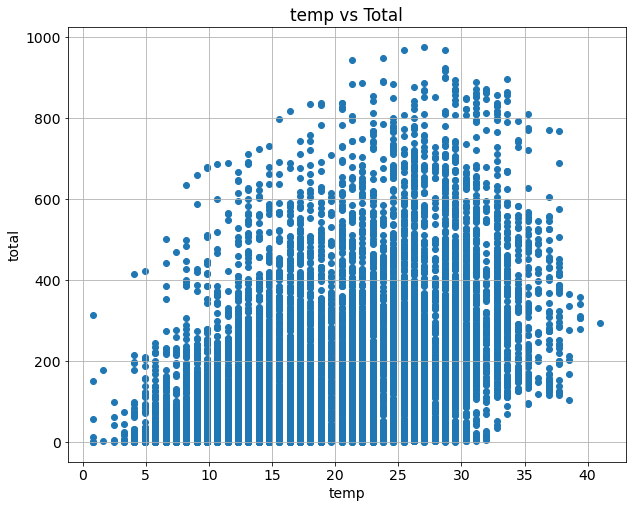

In [6]:
# Évolution du nombre de loca-tions de vélos fonction de la variable temp
plt.scatter(x=velo_partage.temp,y=velo_partage["total"])
plt.grid(True)
plt.xlabel('temp')
plt.ylabel('total')
plt.title('temp vs Total')
plt.show()

# explorer plus de features, plusieurs diagrammes de dispersion en Pandas

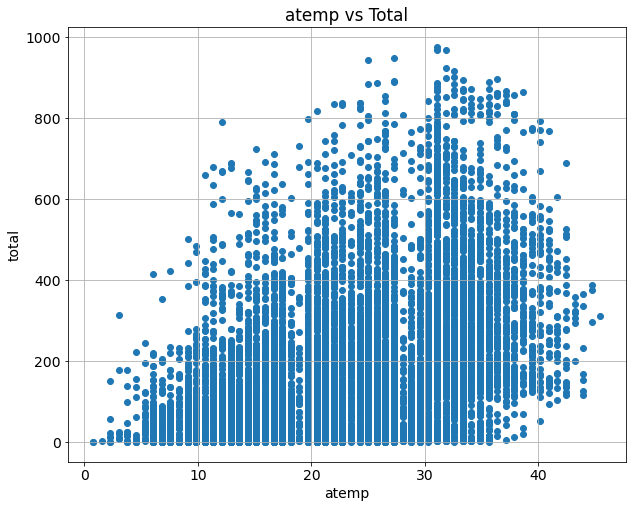

In [7]:
# Évolution du nombre de loca-tions de vélos fonction de la variable atemp
plt.scatter(x=velo_partage.atemp,y=velo_partage["total"])
plt.grid(True)
plt.xlabel('atemp')
plt.ylabel('total')
plt.title('atemp vs Total')
plt.show()

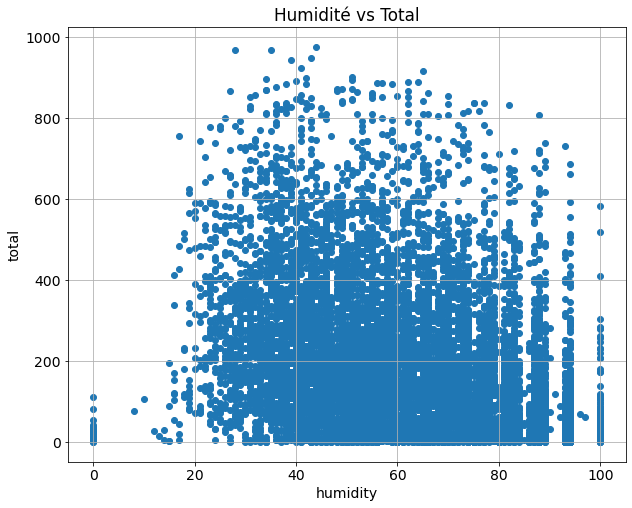

In [8]:
# Évolution du nombre de loca-tions de vélos fonction de la variable humidity
plt.scatter(x=velo_partage.humidity,y=velo_partage["total"])
plt.grid(True)
plt.xlabel('humidity')
plt.ylabel('total')
plt.title('Humidité vs Total')
plt.show()

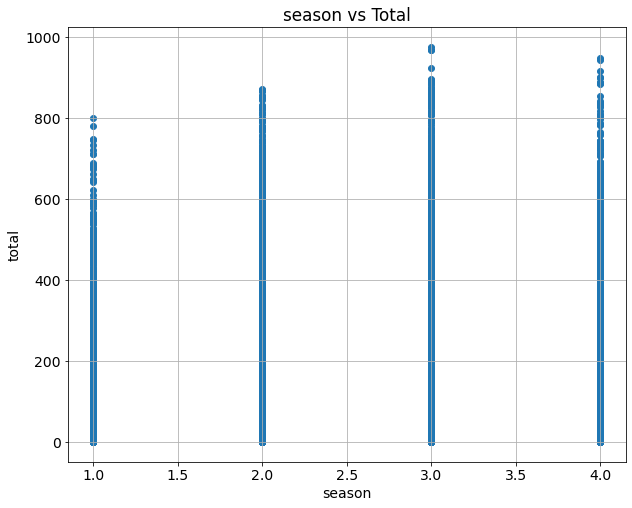

In [9]:
# Évolution du nombre de loca-tions de vélos fonction de la variable season
plt.scatter(x=velo_partage.season,y=velo_partage["total"])
plt.grid(True)
plt.xlabel('season')
plt.ylabel('total')
plt.title('season vs Total')
plt.show()

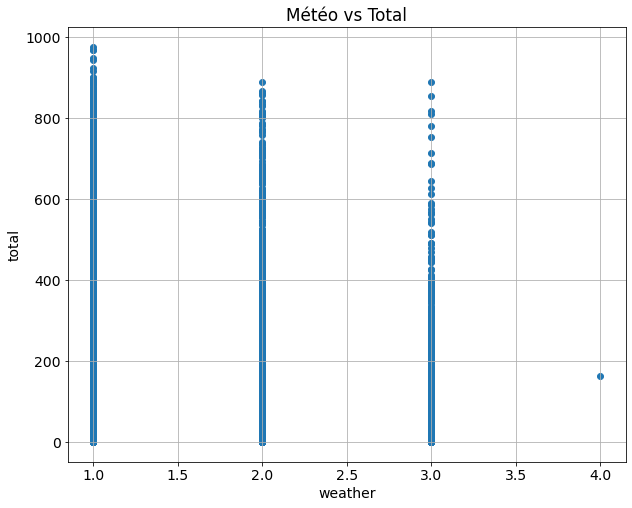

In [10]:
# Évolution du nombre de loca-tions de vélos fonction de la variable weather
plt.scatter(x=velo_partage.weather,y=velo_partage["total"])
plt.grid(True)
plt.xlabel('weather')
plt.ylabel('total')
plt.title('Météo vs Total')
plt.show()

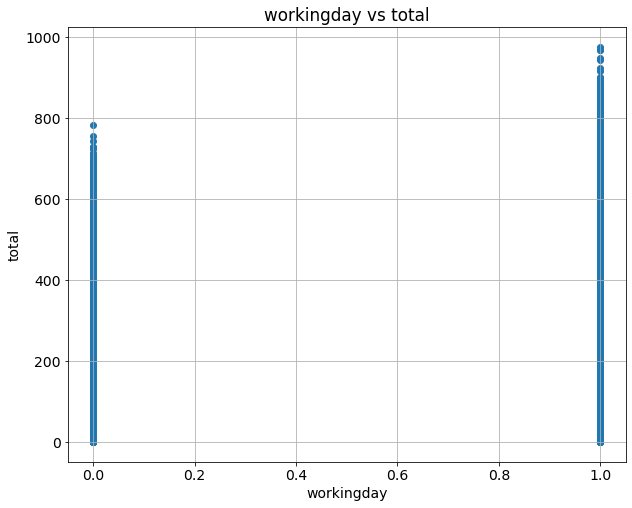

In [11]:
# Évolution du nombre de loca-tions de vélos fonction de la variable workingday
plt.scatter(x=velo_partage.workingday,y=velo_partage["total"])
plt.grid(True)
plt.xlabel('workingday')
plt.ylabel('total')
plt.title('workingday vs total')
plt.show()

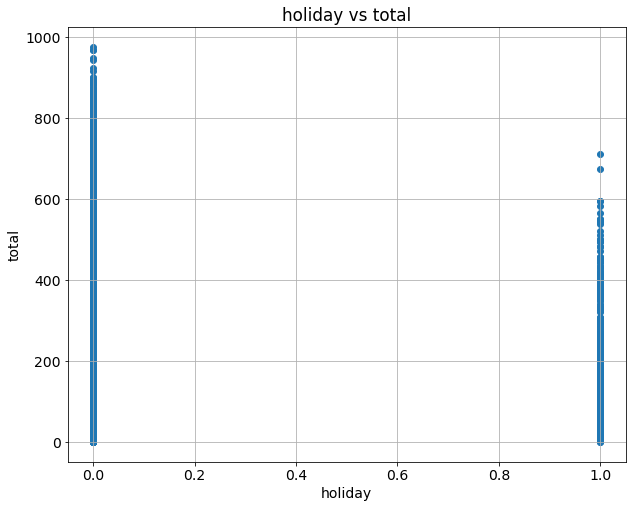

In [12]:
# Évolution du nombre de loca-tions de vélos fonction de la variablebholiday
plt.scatter(x=velo_partage.holiday,y=velo_partage["total"])
plt.grid(True)
plt.xlabel('holiday')
plt.ylabel('total')
plt.title('holiday vs total')
plt.show()

In [13]:
# tableau croisé de la variable saison(season) en fonction de la variable mois
pd.crosstab(velo_partage.season, velo_partage.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
season,,,,,,,,,,,,
1,884,901,901,0,0,0,0,0,0,0,0,0
2,0,0,0,909,912,912,0,0,0,0,0,0
3,0,0,0,0,0,0,912,912,909,0,0,0
4,0,0,0,0,0,0,0,0,0,911,911,912


In [14]:
# tableau croisé de la variable météo(weather) en fonction de la variable mois
pd.crosstab(velo_partage.weather, velo_partage.index.month)

col_0,1,2,3,4,5,6,7,8,9,10,11,12
weather,,,,,,,,,,,,
1,592,576,591,592,528,681,718,654,558,543,630,529
2,231,237,247,241,287,180,155,195,254,255,235,317
3,60,88,63,76,97,51,39,63,97,113,46,66
4,1,0,0,0,0,0,0,0,0,0,0,0


# boxplot

Text(0.5, 1.0, 'boxplot saison par rapport à total')

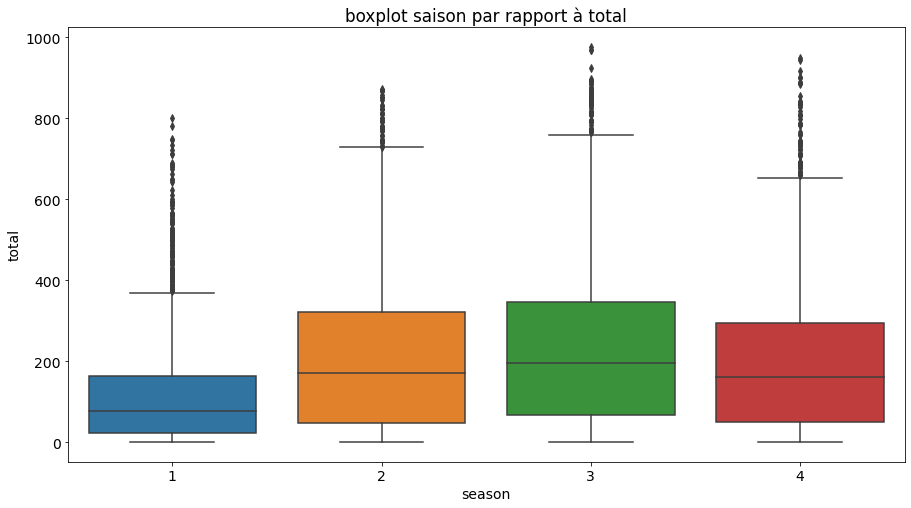

In [15]:
# box plot des locations de velo regroupées par saison
plt.figure(figsize=(15,8))
sns.boxplot(x='season', y='total', data=velo_partage)
plt.title('boxplot saison par rapport à total')

Text(0.5, 1.0, 'boxplot météo par rapport à total')

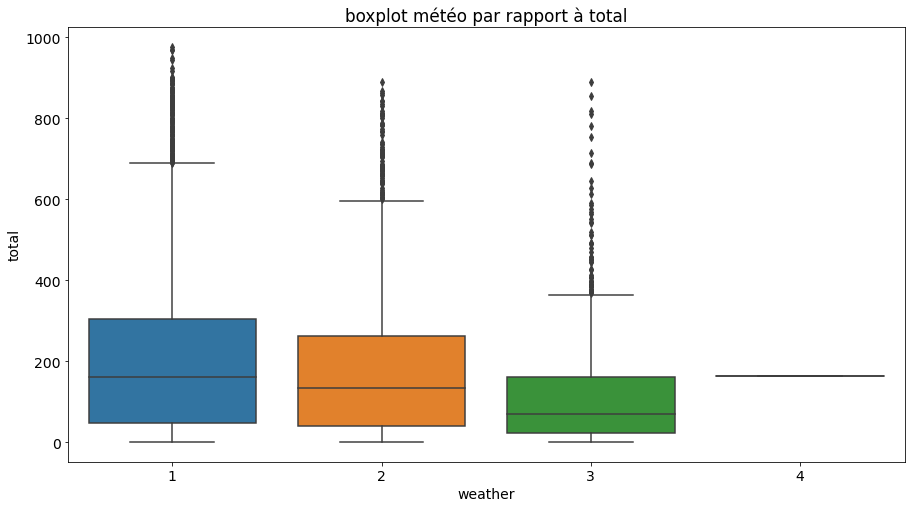

In [16]:
# box plot des locations de velo regroupées par météo
plt.figure(figsize=(15,8))
sns.boxplot(x='weather', y='total', data=velo_partage)
plt.title('boxplot météo par rapport à total')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  after removing the cwd from sys.path.


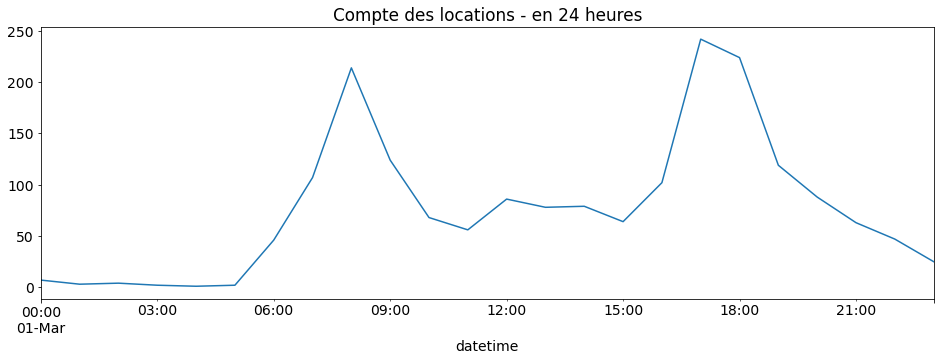

In [17]:
# Graphique de location de vélo durant une journée 1 soit 24 heures
plt.figure(figsize=(16,5))
plt.title('Compte des locations - en 24 heures')
velo_partage['2011-03-01']['total'].plot()
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  after removing the cwd from sys.path.


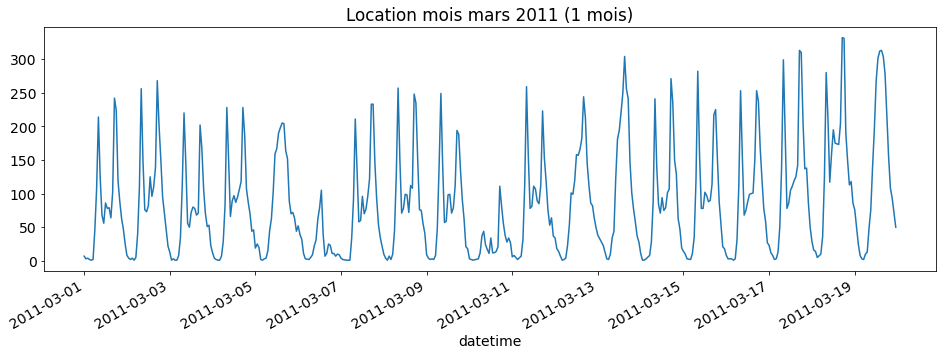

In [18]:
#  Evolution du nombre de location de velo sur 1 mois (du 1er au 19)
plt.figure(figsize=(16,5))
plt.title('Location mois mars 2011 (1 mois)')
velo_partage['2011-03']['total'].plot()
plt.show()

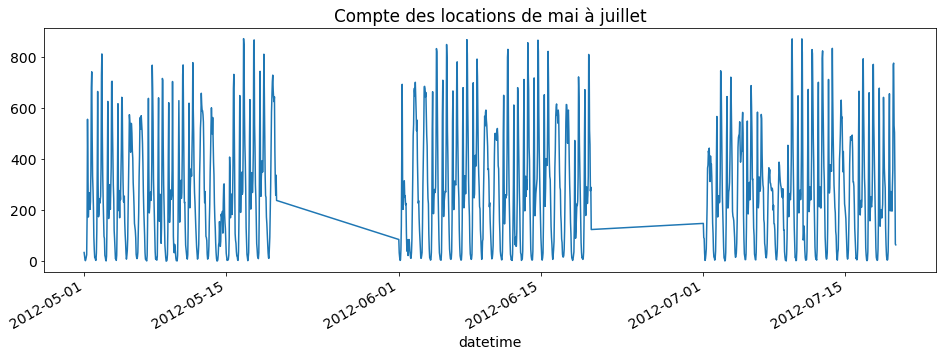

In [19]:
# Evolution du nombre de location de vélo sur 3 mois (mai-juillet 2012)
plt.figure(figsize=(16,5))
plt.title('Compte des locations de mai à juillet')
velo_partage['2012-05':'2012-07']['total'].plot()
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  after removing the cwd from sys.path.


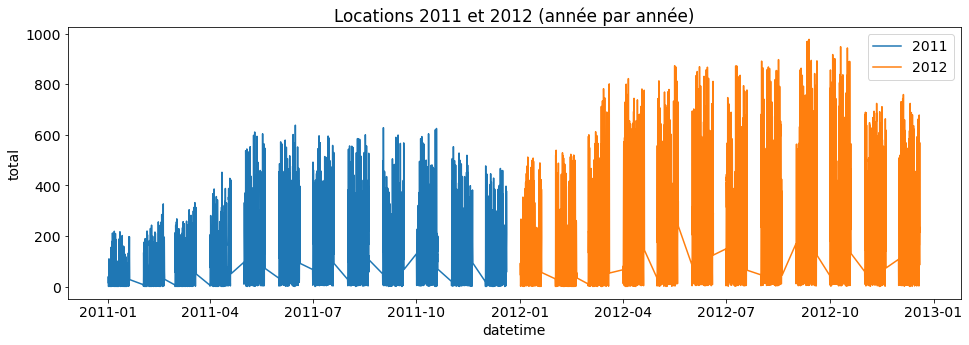

In [20]:
#  Evolution du nombre de location de vélo sur deux années de janviers 2011 à decembre 2012 (année par année)
plt.figure(figsize=(16,5))
plt.plot(velo_partage['2011']['total'],label='2011')
plt.plot(velo_partage['2012']['total'],label='2012')
#plt.plot(df['2012']['count'],label='2012')
plt.title('Locations 2011 et 2012 (année par année)')
plt.xlabel('datetime')
plt.ylabel('total')
plt.legend()
plt.show()

In [21]:
# description des données (moyennes,ecart type,valeurs minimal,quantile, valeurs maximal)
velo_partage.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [22]:
# la matrice de corrélation
velo_partage.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


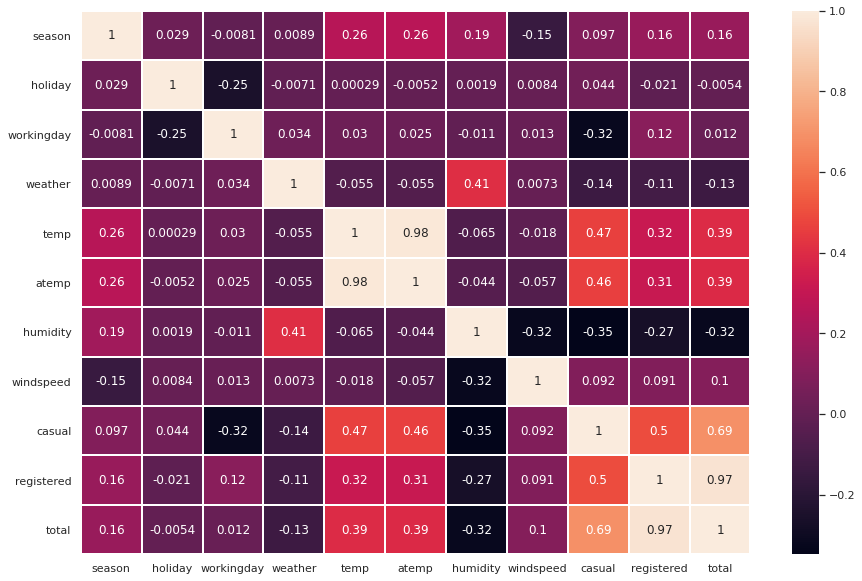

In [23]:
# visualisation de la matrice de corrélation en utilsant heatmap
#Matrice de corr"lation
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(velo_partage.corr(),annot=True,linewidths=1.0);

# Méthode de la régression linéaire

# Forme de la régression linéaire 

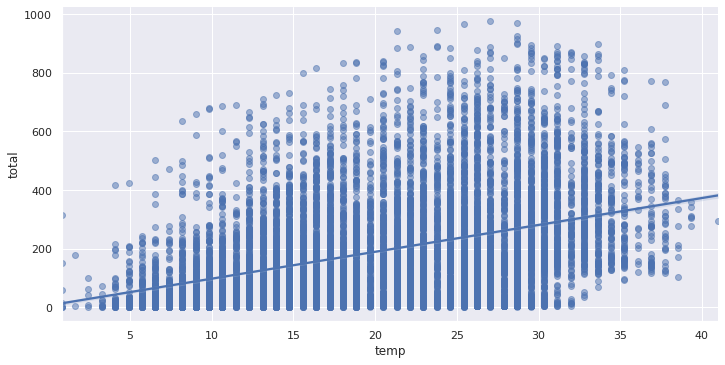

In [24]:
# Nuage de point et la droite de regression linéaire x, y
sns.lmplot(x='temp', y='total', data=velo_partage, aspect=2.0, scatter_kws={'alpha':0.5})

# Construire un modèle de régression linéaire

In [25]:
# creation de features X et y de la droite de regression 
feature_cols = ['temp']
X = velo_partage[feature_cols]
y = velo_partage.total

In [26]:
# importation de la librairie, instantiate, fit
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [27]:
# Affichage des coefficients
print(linreg.intercept_)
print(linreg.coef_)

6.046212959616611
[9.17054048]


# Utilisation du modèle pour la prédiction

In [28]:
#calculons manuellement la prédiction
linreg.intercept_ + linreg.coef_*37

array([345.35621077])

# L'échelle des fonctionnalités est-elle importante?

In [29]:
# créeation d'une nouvelle colonne pour la température en degrés kelvin
velo_partage['temp_K'] = velo_partage.temp + 273.15
velo_partage.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_K
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,282.99
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,282.17
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,282.17
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,282.99
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,282.99


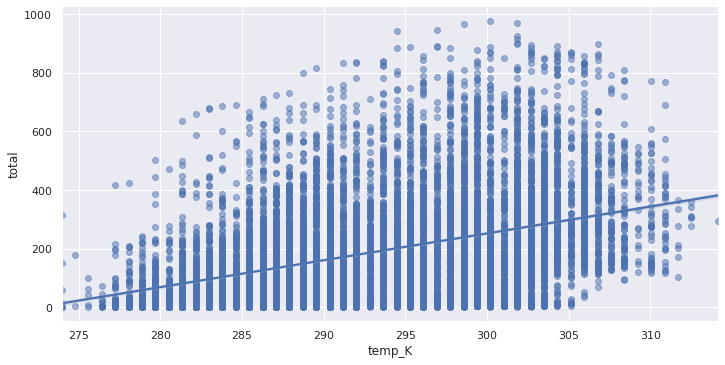

In [30]:
# Nuage de points total par rapport à la temp_K et la droite de régression
sns.lmplot(x='temp_K', y='total', data=velo_partage, aspect=2.0, scatter_kws={'alpha':0.5})

In [31]:
#creation de X et y

feature_cols = ['temp_K']
X = velo_partage[feature_cols]
y = velo_partage.total

# instantiate et fit
linreg = LinearRegression()
linreg.fit(X, y)

# Affichage des coefficients 
print(linreg.intercept_)
print(linreg.coef_)

-2498.886919541962
[9.17054048]


In [32]:
#convertir 37 degrés Celsius en degrés kelvin (37 temperature noremale)
K=37 + 273.15

# la valeur de la température en degrés kelvin
K

310.15

In [33]:
#tableau
array = 310.15

In [34]:
import numpy as np
degres = np.array(37).reshape(-1,1)
degres 

array([[37]])

In [35]:
# prédiction des locations de velos pour 310.15 degrés kelvin
linreg.predict(degres )

array([-2159.57692173])

In [36]:
# suppression de la colonne temp_K du tableau
velo_partage.drop('temp_K', axis=1, inplace=True)

# Ajout de fonctionnalités supplémentaires au modèle

In [37]:
# creation d'une liste de features
feature_cols = ['temp', 'season', 'weather', 'humidity', 'holiday', 'workingday']

In [38]:
# creattion de X et y
X = velo_partage[feature_cols]
y = velo_partage.total

# instantiate et fit
linreg = LinearRegression()
linreg.fit(X, y)

# Afficher les coefficients
print(linreg.intercept_)
print(linreg.coef_)

160.84457826398182
[  7.86627898  22.58108716   6.70650006  -3.12004694 -10.70514989
  -1.66299834]


# Evaluation métriques pour les problèmes de régression

In [39]:
# example et les valeurs de réponse prédites
valeurs_rélles = [8, 3, 25, 10, 15, 4]
valeurs_predites = [7, 2, 8, 4, 6, 5]

In [40]:

# calculer des metriques
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(valeurs_rélles, valeurs_predites))
print('MSE:', metrics.mean_squared_error(valeurs_rélles, valeurs_predites))
print('RMSE:', np.sqrt(metrics.mean_squared_error(valeurs_rélles, valeurs_predites)))

MAE: 5.833333333333333
MSE: 68.16666666666667
RMSE: 8.256310717667224


In [41]:
# les mêmes vraies valeurs que ci-dessus
valeurs_rélles = [8, 3, 25, 10, 15, 4]

# nouvel ensemble de valeurs prédites
valeurs_predites = [8, 3, 9, 18, 2, 5]

# Le MAE reste le même qu'auparavant
print('MAE:', metrics.mean_absolute_error(valeurs_rélles, valeurs_predites))

# MSE et sont plus importants qu'auparavant
print('MSE:', metrics.mean_squared_error(valeurs_rélles, valeurs_predites))

# RMSE sont plus importants qu'auparavant
print('RMSE:', np.sqrt(metrics.mean_squared_error(valeurs_rélles, valeurs_predites)))

MAE: 6.333333333333333
MSE: 81.66666666666667
RMSE: 9.03696114115064


# Comparaison des modèles avec la division train / test et MSE

In [42]:
from sklearn.model_selection import train_test_split

# définir une fonction qui accepte une liste de variables et retourne des tests MSE
def train_test_mse(feature_cols):
    X = velo_partage[feature_cols]
    y = velo_partage.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return metrics.mean_squared_error(y_test, y_pred)

In [43]:
# comparaison des différents ensembles de variables
print(train_test_mse(['temp', 'season', 'weather', 'humidity']))
print(train_test_mse(['temp', 'season', 'weather']))
print(train_test_mse(['temp', 'season', 'humidity']))
print(train_test_mse(['temp', 'weather', 'humidity']))
print(train_test_mse(['season', 'weather', 'humidity']))

24226.75412770957
26950.27847931875
24210.796534262085
24727.655334517996
27216.731244755363


In [44]:
# Il n'est pas permis de les utiliser comme variables !
train_test_mse(['casual', 'registered'])

1.4613939889823902e-27

# Comparaison des modèles avec la division train / test et RMSE

In [45]:
from sklearn.model_selection import train_test_split

# définir une fonction qui accepte une liste de variables et retourne des tests RMSE
def train_test_rmse(feature_cols):
    X = velo_partage[feature_cols]
    y = velo_partage.total
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [46]:
# comparaison des différents ensembles de variables
print(train_test_rmse(['temp', 'season', 'weather', 'humidity']))
print(train_test_rmse(['temp', 'season', 'weather']))
print(train_test_rmse(['temp', 'season', 'humidity']))
print(train_test_rmse(['temp', 'weather', 'humidity']))
print(train_test_rmse(['season', 'weather', 'humidity']))

155.64945913079674
164.1653997629182
155.59818936691417
157.25029518102025
164.97494126307595


In [47]:
# Il n'est pas permis de les utiliser comme variables !
train_test_rmse(['casual', 'registered'])

3.8228183176583084e-14

# Comparaison entre les RMSE tests  et les RMSE nulles

In [48]:
# diviser X et y en ensembles d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# création d'un tableau NumPy ayant la même forme que y_test
y_null = np.zeros_like(y_test, dtype=float)

# remplissage du tableau avec la valeur moyenne de y_test
y_null.fill(y_test.mean())
y_null

array([192.26451139, 192.26451139, 192.26451139, ..., 192.26451139,
       192.26451139, 192.26451139])

In [49]:
# calcule de la valeur RMSE nulle
np.sqrt(metrics.mean_squared_error(y_test, y_null))

179.57906896465727

# **Gestion des features catégoriels**

In [50]:
# création des variables fictives (dummies).
season_dummies = pd.get_dummies(velo_partage.season, prefix='season')

#Afficher aléatoirement 10 lignes des 4 saison
season_dummies.sample(n=10, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1
2011-07-13 21:00:00,0,0,1,0
2011-04-05 14:00:00,0,1,0,0
2012-09-03 18:00:00,0,0,1,0
2012-05-09 15:00:00,0,1,0,0


In [51]:
# laissé tomber la saison_3
season_dummies.drop(season_dummies.columns[2], axis=1, inplace=True)

# afficher 10 lignes aux hasard
season_dummies.sample(n=10, random_state=1)

,season_1,season_2,season_4
datetime,,,
2011-09-05 11:00:00,0,0,0
2012-03-18 04:00:00,1,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,0,1,0
2012-12-11 02:00:00,0,0,1
2011-07-13 21:00:00,0,0,0
2011-04-05 14:00:00,0,1,0
2012-09-03 18:00:00,0,0,0
2012-05-09 15:00:00,0,1,0


In [52]:
# concaténation du DataFrame original et du DataFrame factice (axis=0 means rows, axis=1 means columns)
velo_partage = pd.concat([velo_partage, season_dummies], axis=1)

# afficher 5 lignes aux hasard
velo_partage.sample(n=10, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_1,season_2,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0,0,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,1,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,0,1,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,0,1
2011-07-13 21:00:00,3,0,1,1,28.70,33.335,79,7.0015,56,194,250,0,0,0
2011-04-05 14:00:00,2,0,1,2,14.76,15.910,57,32.9975,9,67,76,0,1,0
2012-09-03 18:00:00,3,1,0,1,30.34,34.850,66,11.0014,145,337,482,0,0,0
2012-05-09 15:00:00,2,0,1,2,26.24,31.060,53,7.0015,68,191,259,0,1,0


In [53]:
# inclure des variables factices pour la saison dans le modèle
feature_cols = ['temp', 'season_1', 'season_2', 'season_4', 'humidity']
X = velo_partage[feature_cols]
y = velo_partage.total
linreg = LinearRegression()
linreg.fit(X, y)


for features,coeff in zip(feature_cols, linreg.coef_):
    print(features,coeff)

temp 11.186405863575775
season_1 41.73686071317084
season_2 38.346317613452946
season_4 106.15282218141292
humidity -2.8194816362596526


In [54]:
# comparaison de la variable de saison originale avec les variables factices
print(train_test_rmse(['temp', 'season', 'humidity']))
print(train_test_rmse(['temp', 'season_1', 'season_2', 'season_4', 'humidity']))

155.59818936691417
154.33394593635998


# Ingenerie de fonctionnalité

In [55]:
# Choix de l'heure comme features numérique
velo_partage['hour'] = velo_partage.index.hour

In [56]:
# Choix de l'heure comme features catégoriel
hour_dummies = pd.get_dummies(velo_partage.hour, prefix='hour')
hour_dummies.drop(hour_dummies.columns[0], axis=1, inplace=True)
velo_partage = pd.concat([velo_partage, hour_dummies], axis=1)

In [57]:
# Choix de la journée comme variable catégoriel
velo_partage['daytime'] = ((velo_partage.hour > 5) & (velo_partage.hour < 20)).astype(int)

In [58]:
print(train_test_rmse(['hour']))
print(train_test_rmse(velo_partage.columns[velo_partage.columns.str.startswith('hour_')]))
print(train_test_rmse(['daytime']))

165.67174264111398
128.3112050281119
152.56495224553757
